In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              37500 non-null  int64  
 1   beer/ABV           37500 non-null  float64
 2   beer/beerId        37500 non-null  int64  
 3   beer/brewerId      37500 non-null  int64  
 4   beer/name          37500 non-null  object 
 5   beer/style         37500 non-null  object 
 6   review/appearance  37500 non-null  float64
 7   review/aroma       37500 non-null  float64
 8   review/overall     37500 non-null  float64
 9   review/palate      37500 non-null  float64
 10  review/taste       37500 non-null  float64
 11  review/text        37490 non-null  object 
 12  review/timeStruct  37500 non-null  object 
 13  review/timeUnix    37500 non-null  int64  
 14  user/ageInSeconds  7856 non-null   float64
 15  user/birthdayRaw   7856 non-null   object 
 16  user/bir

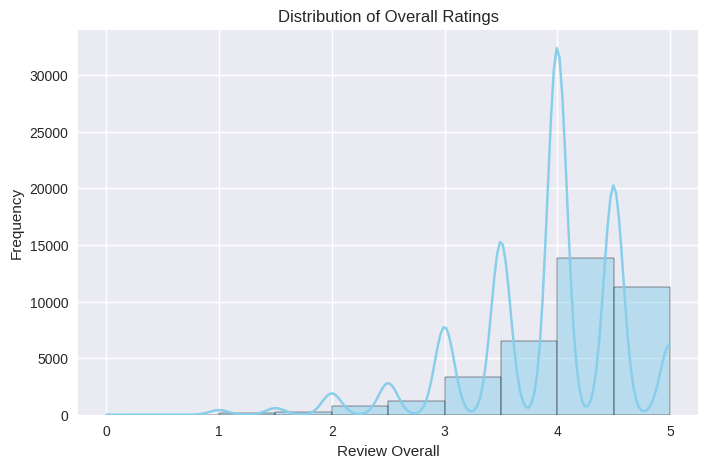

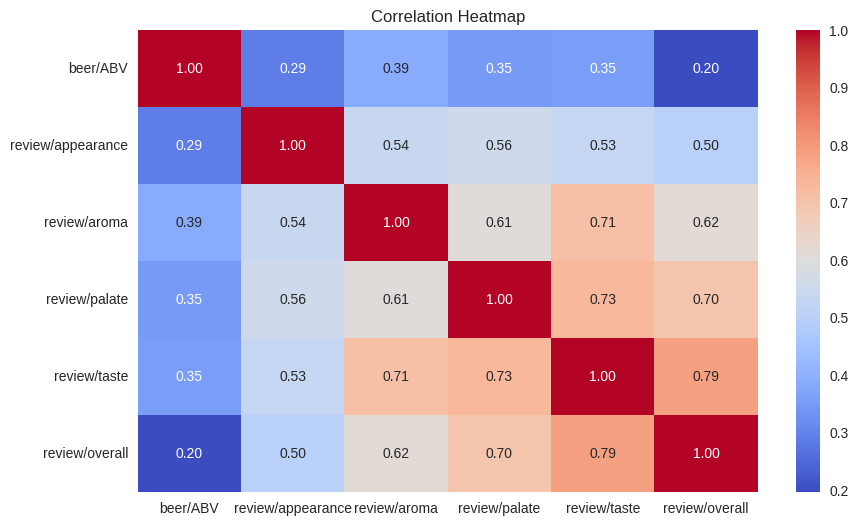

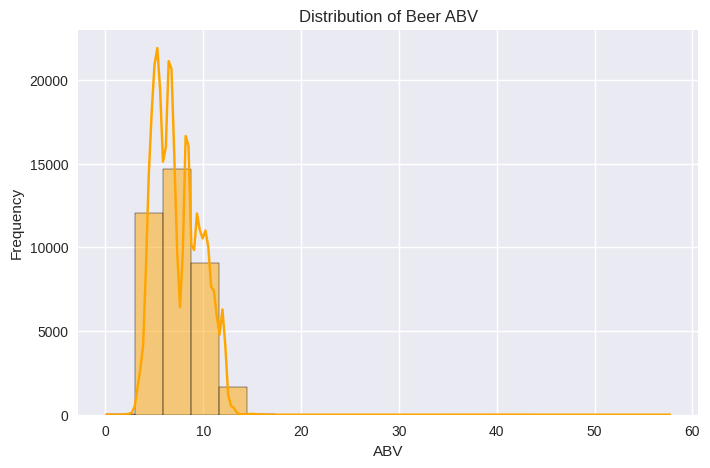

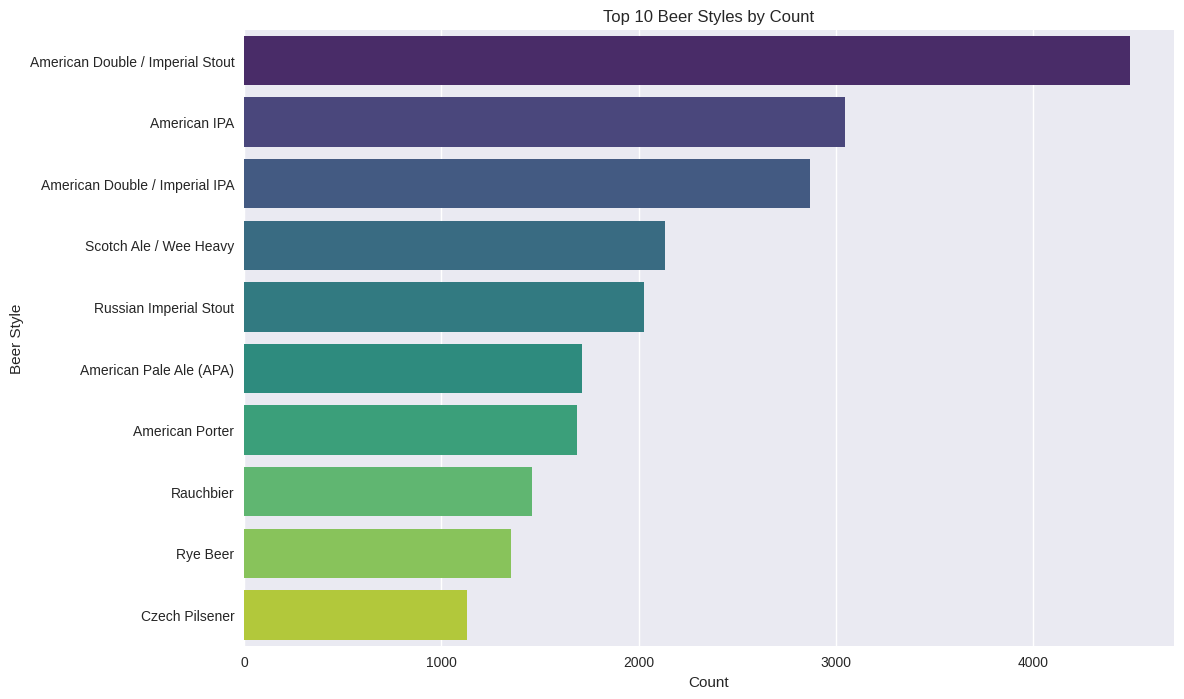

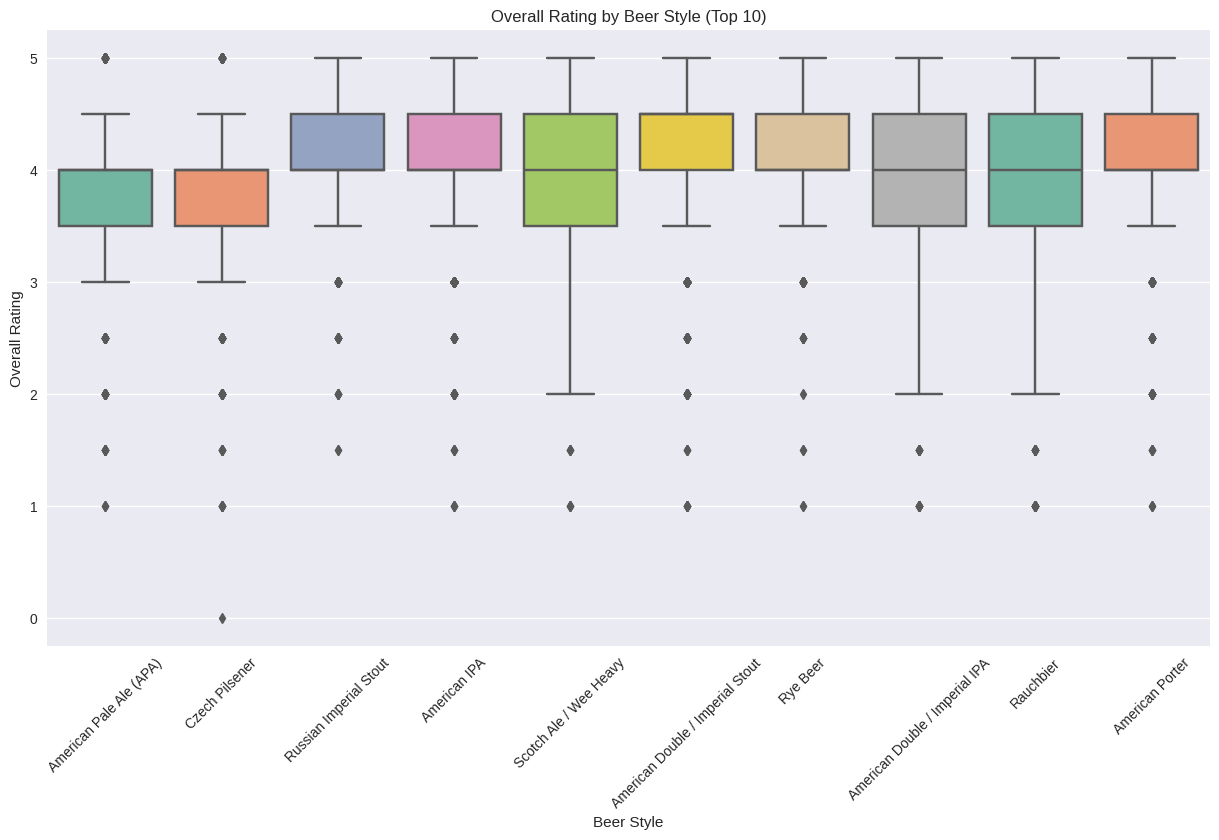

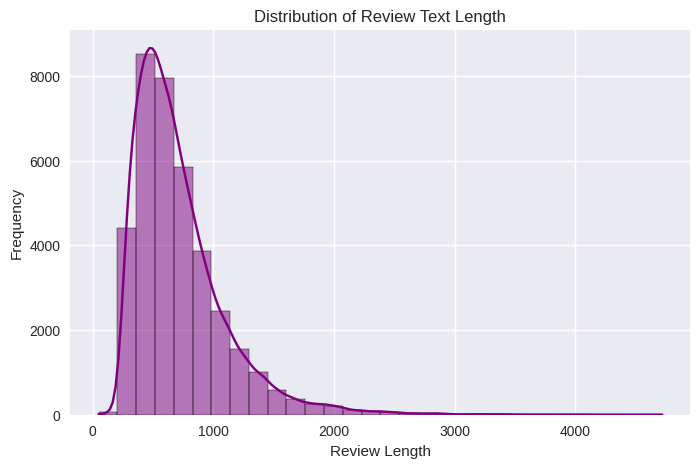

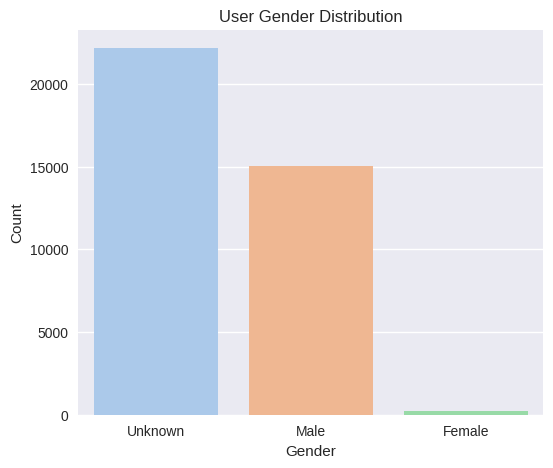

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace 'train.csv' with your actual file name)
data = pd.read_csv('/kaggle/input/beer-dataset/train.csv')
#%%
# Display basic information about the dataset
print("Dataset Info:")
print(data.info())

#%%
print("\nFirst 5 rows of the dataset:")
print(data.head())
#%%
# Checking for missing values
print("\nMissing Values in Dataset:")
print(data.isnull().sum())
#%%
# Summary statistics of numerical features
print("\nSummary Statistics of Numerical Features:")
print(data.describe())
#%%
# Dropping rows with missing 'review/text' since it is a key feature
data = data.dropna(subset=['review/text'])

# Imputing 'user/gender' with "Unknown"
data['user/gender'] = data['user/gender'].fillna('Unknown')

# Dropping user-related columns with excessive missing values
data = data.drop(['user/ageInSeconds', 'user/birthdayRaw', 'user/birthdayUnix'], axis=1)

# Dropping rows with missing 'user/profileName'
data = data.dropna(subset=['user/profileName'])

# Confirming missing values after handling
print("\nMissing Values After Processing:")
print(data.isnull().sum())

#%%
# Distribution of the target variable (review/overall)
plt.figure(figsize=(8, 5))
sns.histplot(data['review/overall'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Overall Ratings')
plt.xlabel('Review Overall')
plt.ylabel('Frequency')
plt.show()

#%%
# Correlation Heatmap
numeric_features = ['beer/ABV', 'review/appearance', 'review/aroma', 'review/palate', 'review/taste', 'review/overall']
plt.figure(figsize=(10, 6))
sns.heatmap(data[numeric_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
#%%
# Distribution of 'beer/ABV' (Alcohol by Volume)
plt.figure(figsize=(8, 5))
sns.histplot(data['beer/ABV'].dropna(), bins=20, kde=True, color='orange')
plt.title('Distribution of Beer ABV')
plt.xlabel('ABV')
plt.ylabel('Frequency')
plt.show()
#%%
# Analyzing categorical feature: beer/style
plt.figure(figsize=(12, 8))
top_styles = data['beer/style'].value_counts().head(10)
sns.barplot(x=top_styles.values, y=top_styles.index, palette='viridis')
plt.title('Top 10 Beer Styles by Count')
plt.xlabel('Count')
plt.ylabel('Beer Style')
plt.show()
#%%
# Boxplot of overall rating by beer style
top_styles_list = top_styles.index.tolist()
filtered_data = data[data['beer/style'].isin(top_styles_list)]
plt.figure(figsize=(15, 8))
sns.boxplot(x='beer/style', y='review/overall', data=filtered_data, palette='Set2')
plt.title('Overall Rating by Beer Style (Top 10)')
plt.xticks(rotation=45)
plt.xlabel('Beer Style')
plt.ylabel('Overall Rating')
plt.show()

#%%
# Analyzing review text length
data['review_length'] = data['review/text'].apply(lambda x: len(str(x)))
plt.figure(figsize=(8, 5))
sns.histplot(data['review_length'], bins=30, kde=True, color='purple')
plt.title('Distribution of Review Text Length')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()
#%%
# Gender Distribution
plt.figure(figsize=(6, 5))
gender_counts = data['user/gender'].fillna('Unknown').value_counts()
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='pastel')
plt.title('User Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


GPU available: True
GPU name: Tesla P100-PCIE-16GB

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              37500 non-null  int64  
 1   beer/ABV           37500 non-null  float64
 2   beer/beerId        37500 non-null  int64  
 3   beer/brewerId      37500 non-null  int64  
 4   beer/name          37500 non-null  object 
 5   beer/style         37500 non-null  object 
 6   review/appearance  37500 non-null  float64
 7   review/aroma       37500 non-null  float64
 8   review/overall     37500 non-null  float64
 9   review/palate      37500 non-null  float64
 10  review/taste       37500 non-null  float64
 11  review/text        37490 non-null  object 
 12  review/timeStruct  37500 non-null  object 
 13  review/timeUnix    37500 non-null  int64  
 14  user/ageInSeconds  7856 non-null   float64
 15  user

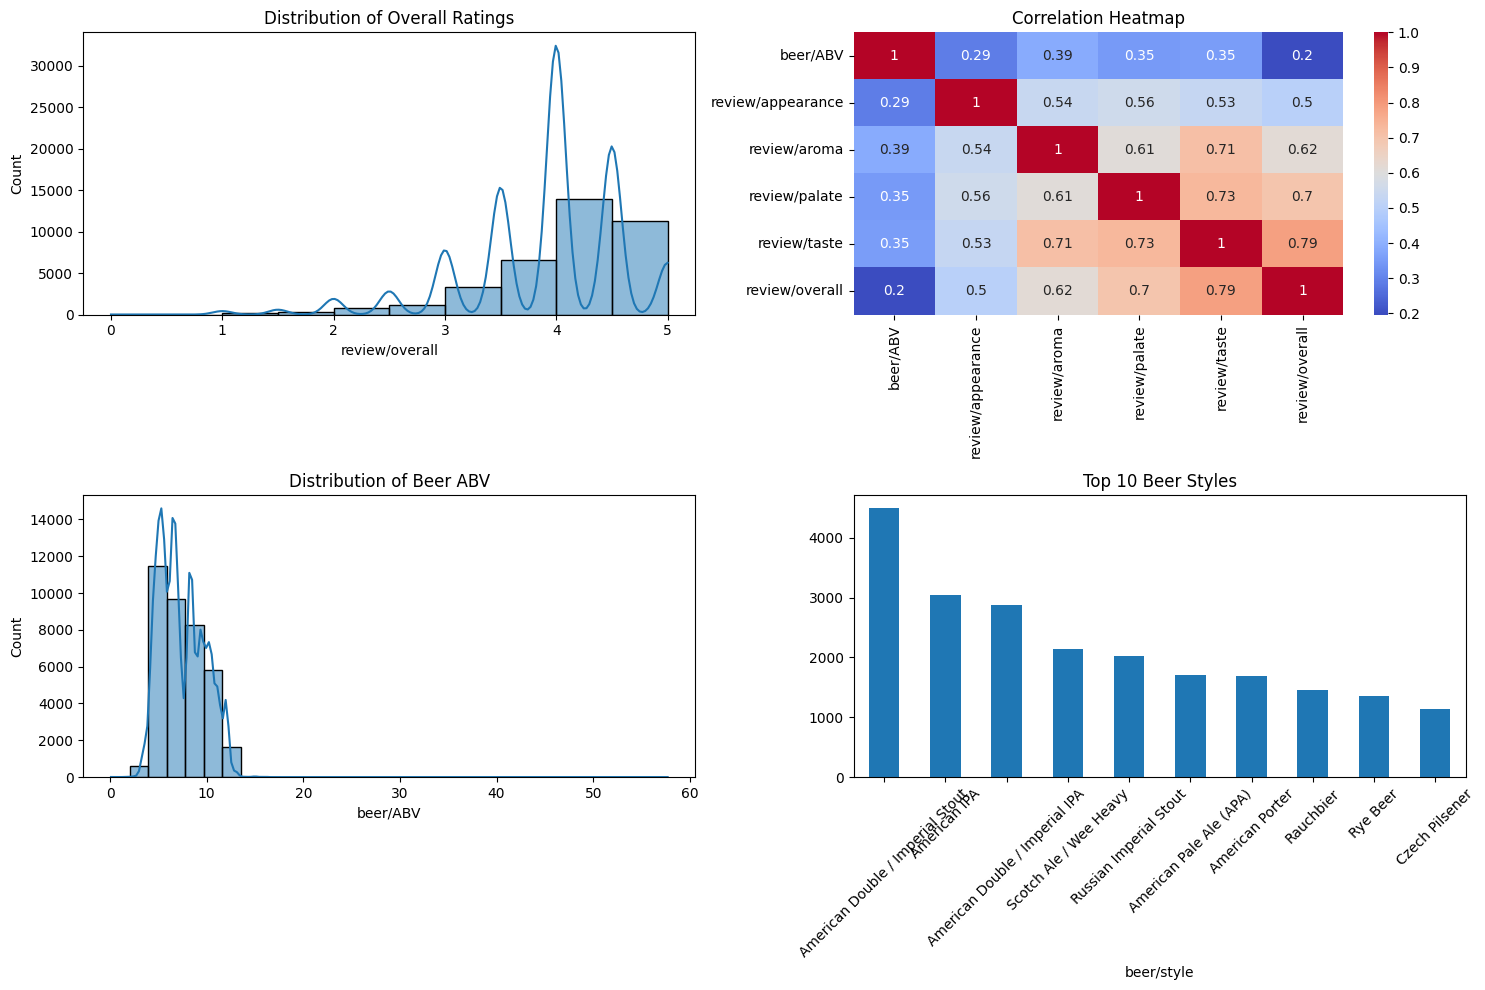

Processing features...
Training models...

Training LightGBM...
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 206669
[LightGBM] [Info] Number of data points in the train set: 37485, number of used features: 1019
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 25 dense feature groups (1.00 MB) transferred to GPU in 0.001638 secs. 1 sparse feature groups
[LightGBM] [Info] Start training from score 3.889182
[LightGBM] [Warning] feature_fraction is set=0

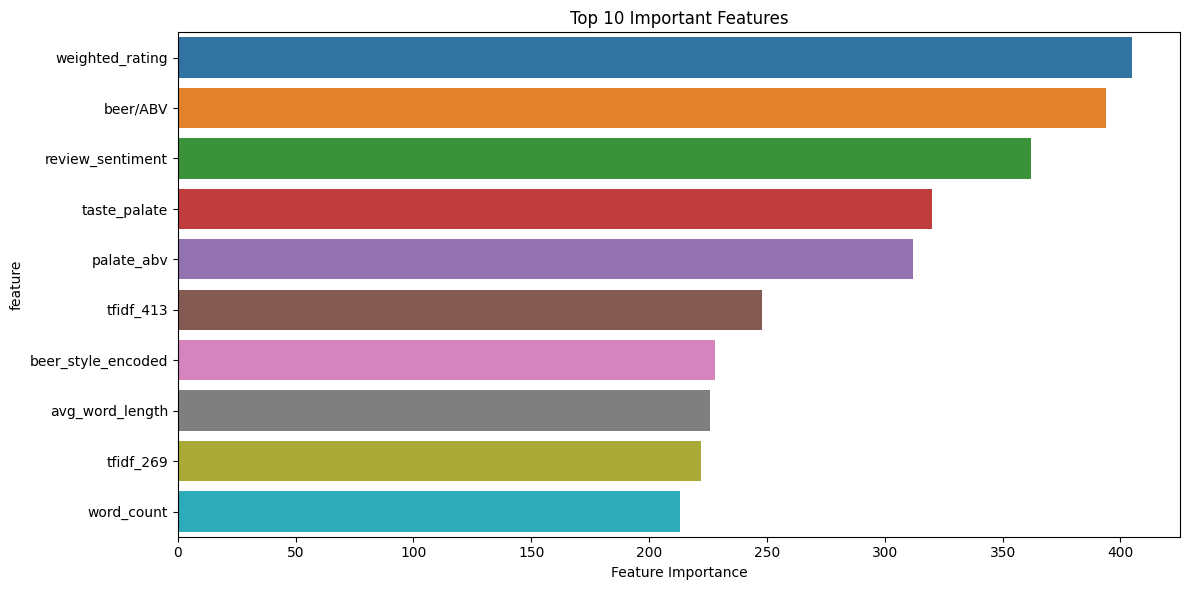

In [1]:
import torch
import numpy as np
import pandas as pd
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostRegressor
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import StackingRegressor
import scipy.sparse as sparse
import warnings
warnings.filterwarnings('ignore')

# Check GPU
print("GPU available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("GPU name:", torch.cuda.get_device_name(0))

# Load and preprocess data
data = pd.read_csv('/kaggle/input/beer-dataset/train.csv')

# Basic EDA
print("\nDataset Info:")
print(data.info())

print("\nMissing Values:")
print(data.isnull().sum())

# Data Cleaning
data = data.dropna(subset=['review/text'])
data['user/gender'] = data['user/gender'].fillna('Unknown')
data = data.drop(['user/ageInSeconds', 'user/birthdayRaw', 'user/birthdayUnix'], axis=1)
data = data.dropna(subset=['user/profileName'])

# EDA Visualizations
plt.figure(figsize=(15, 10))

# Plot 1: Distribution of Overall Ratings
plt.subplot(2, 2, 1)
sns.histplot(data['review/overall'], bins=10, kde=True)
plt.title('Distribution of Overall Ratings')

# Plot 2: Correlation Heatmap
plt.subplot(2, 2, 2)
numeric_cols = ['beer/ABV', 'review/appearance', 'review/aroma', 
                'review/palate', 'review/taste', 'review/overall']
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

# Plot 3: ABV Distribution
plt.subplot(2, 2, 3)
sns.histplot(data['beer/ABV'], bins=30, kde=True)
plt.title('Distribution of Beer ABV')

# Plot 4: Top Beer Styles
plt.subplot(2, 2, 4)
data['beer/style'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Beer Styles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Feature Engineering
def engineer_features(data):
    # Text features
    tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
    text_features = tfidf.fit_transform(data['review/text'])
    
    # Basic features
    data['review_length'] = data['review/text'].apply(len)
    data['word_count'] = data['review/text'].str.split().str.len()
    data['avg_word_length'] = data['review/text'].apply(
        lambda x: np.mean([len(word) for word in str(x).split()])
    )
    
    # Sentiment analysis
    data['review_sentiment'] = data['review/text'].apply(
        lambda x: TextBlob(str(x)).sentiment.polarity
    )
    
    # Review score interactions
    data['taste_aroma'] = data['review/taste'] * data['review/aroma']
    data['taste_palate'] = data['review/taste'] * data['review/palate']
    data['palate_abv'] = data['review/palate'] * data['beer/ABV']
    
    # Normalized scores
    data['taste_norm'] = data['review/taste'] / data['review/taste'].max()
    data['aroma_norm'] = data['review/aroma'] / data['review/aroma'].max()
    data['palate_norm'] = data['review/palate'] / data['review/palate'].max()
    
    # Weighted rating
    data['weighted_rating'] = (data['review/taste'] * 0.4 + 
                             data['review/aroma'] * 0.2 +
                             data['review/palate'] * 0.2 + 
                             data['review/appearance'] * 0.2)
    
    # Beer characteristics
    data['abv_category'] = pd.cut(data['beer/ABV'], 
                                 bins=[0,5,8,12,100], 
                                 labels=[0,1,2,3]).astype(int)
    
    # Categorical encoding
    le = LabelEncoder()
    data['beer_style_encoded'] = le.fit_transform(data['beer/style'])
    data['gender_encoded'] = le.fit_transform(data['user/gender'])
    
    return data, text_features

def prepare_features(data, text_features):
    numeric_features = [
        'beer/ABV', 'review/appearance', 'review/aroma', 'review/palate',
        'review/taste', 'review_length', 'taste_aroma', 'taste_palate',
        'palate_abv', 'abv_category', 'beer_style_encoded', 'gender_encoded',
        'weighted_rating', 'word_count', 'avg_word_length', 'review_sentiment',
        'taste_norm', 'aroma_norm', 'palate_norm'
    ]
    
    # Scale numeric features
    scaler = StandardScaler()
    X_numeric = scaler.fit_transform(data[numeric_features])
    
    # Combine features
    X = sparse.hstack([X_numeric, text_features])
    y = data['review/overall']
    
    return X, y, numeric_features

# Model Configuration
gpu_params = {
    'device': 'gpu',
    'gpu_platform_id': 0,
    'gpu_device_id': 0,
    'boosting_type': 'gbdt'
}

base_params = {
    'n_estimators': 300,
    'learning_rate': 0.05,
    'num_leaves': 63,
    'feature_fraction': 0.8,
    'reg_alpha': 0.1,
    'reg_lambda': 1.0,
    'min_child_samples': 20
}

# Train and evaluate models
def train_evaluate_models(X, y):
    # Single LightGBM
    print("\nTraining LightGBM...")
    lgb_model = lgb.LGBMRegressor(**{**base_params, **gpu_params})
    lgb_model.fit(X, y)
    lgb_pred = lgb_model.predict(X)
    print("LightGBM Metrics:")
    print(f"MAE: {mean_absolute_error(y, lgb_pred):.4f}")
    print(f"R² Score: {r2_score(y, lgb_pred):.4f}")
    
    # Single XGBoost
    print("\nTraining XGBoost...")
    xgb_model = xgb.XGBRegressor(tree_method='gpu_hist', **base_params)
    xgb_model.fit(X, y)
    xgb_pred = xgb_model.predict(X)
    print("XGBoost Metrics:")
    print(f"MAE: {mean_absolute_error(y, xgb_pred):.4f}")
    print(f"R² Score: {r2_score(y, xgb_pred):.4f}")
    
    return lgb_model, xgb_model

# Execute pipeline
print("Processing features...")
data_engineered, text_features = engineer_features(data)
X, y, numeric_features = prepare_features(data_engineered, text_features)

print("Training models...")
lgb_model, xgb_model = train_evaluate_models(X, y)

# Feature importance visualization
plt.figure(figsize=(12, 6))
feature_importance = pd.DataFrame({
    'feature': numeric_features + [f'tfidf_{i}' for i in range(1000)],
    'importance': lgb_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False).head(10)
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Top 10 Important Features')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_extraction.text import TfidfVectorizer
import lightgbm as lgb
from textblob import TextBlob
import warnings

warnings.filterwarnings('ignore')

# Assume `data` is your input DataFrame
# Example: data = pd.read_csv('path_to_your_data.csv')

# Feature Engineering
print("Creating text features...")
data['review_length'] = data['review/text'].str.len()
data['word_count'] = data['review/text'].str.split().str.len()
data['avg_word_length'] = data['review/text'].apply(
    lambda x: np.mean([len(word) for word in str(x).split()])
)

# Sentiment Features
print("Adding sentiment features...")
data['sentiment_polarity'] = data['review/text'].apply(
    lambda x: TextBlob(str(x)).sentiment.polarity
)
data['sentiment_subjectivity'] = data['review/text'].apply(
    lambda x: TextBlob(str(x)).sentiment.subjectivity
)

# TF-IDF Features (limiting to top 50 features)
print("Generating TF-IDF features...")
tfidf = TfidfVectorizer(max_features=50, stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['review/text'].fillna(''))
tfidf_features = [f'text_tfidf_{i}' for i in range(50)]
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_features)
data = pd.concat([data, tfidf_df], axis=1)

# Time Features
print("Extracting time features...")
data['review_datetime'] = pd.to_datetime(data['review/timeUnix'], unit='s')
data['review_hour'] = data['review_datetime'].dt.hour
data['review_month'] = data['review_datetime'].dt.month
data['review_year'] = data['review_datetime'].dt.year
data['is_weekend'] = data['review_datetime'].dt.dayofweek.isin([5, 6]).astype(int)

# Aggregation Features
print("Creating aggregation features...")
data['style_avg_rating'] = data.groupby('beer/style')['review/overall'].transform('mean')
data['style_rating_count'] = data.groupby('beer/style')['review/overall'].transform('count')
data['brewery_avg_rating'] = data.groupby('beer/brewerId')['review/overall'].transform('mean')
data['brewery_rating_count'] = data.groupby('beer/brewerId')['review/overall'].transform('count')
data['user_avg_rating'] = data.groupby('user/profileName')['review/overall'].transform('mean')
data['user_rating_count'] = data.groupby('user/profileName')['review/overall'].transform('count')
data['user_rating_std'] = data.groupby('user/profileName')['review/overall'].transform('std')

# Interaction Features
print("Adding interaction features...")
data['taste_aroma'] = data['review/taste'] * data['review/aroma']
data['palate_appearance'] = data['review/palate'] * data['review/appearance']
data['abv_style_interaction'] = data['beer/ABV'] * data['style_avg_rating']

# Encoding categorical variables
print("Encoding categorical features...")
le = LabelEncoder()
data['style_encoded'] = le.fit_transform(data['beer/style'])
data['gender_encoded'] = le.fit_transform(data['user/gender'].fillna('Unknown'))

# Prepare features for modeling
print("Preparing features for modeling...")
features = [
    'beer/ABV', 'review/appearance', 'review/aroma', 'review/palate', 'review/taste',
    'review_length', 'word_count', 'avg_word_length', 'sentiment_polarity',
    'sentiment_subjectivity', 'review_hour', 'review_month', 'review_year', 
    'is_weekend', 'style_avg_rating', 'style_rating_count', 'brewery_avg_rating',
    'brewery_rating_count', 'user_avg_rating', 'user_rating_count',
    'user_rating_std', 'taste_aroma', 'palate_appearance',
    'abv_style_interaction', 'style_encoded', 'gender_encoded'
] + tfidf_features

X = data[features]
y = data['review/overall']

# Handle missing values
print("Handling missing values...")
X = X.fillna(X.mean())

# Sort data by time for time-based split
data = data.sort_values('review_datetime')
X = X.loc[data.index]
y = y.loc[data.index]

# Model parameters
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'device': 'cpu',
    'num_threads': 4,
    'lambda_l1': 0.1,
    'lambda_l2': 0.1,
    'min_data_in_leaf': 20,
    'verbose': -1
}

# Time-based cross validation
tscv = TimeSeriesSplit(n_splits=5)
cv_scores = []
feature_importance_list = []

print("\nStarting cross-validation...")
for fold, (train_idx, val_idx) in enumerate(tscv.split(X), 1):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    
    train_data = lgb.Dataset(X_train, label=y_train)
    val_data = lgb.Dataset(X_val, label=y_val, reference=train_data)
    
    # Train model
    model = lgb.train(
        params,
        train_data,
        num_boost_round=1000,
        valid_sets=[train_data, val_data],
        callbacks=[
            lgb.early_stopping(stopping_rounds=50),
            lgb.log_evaluation(period=100)
        ]
    )
    
    # Predictions
    val_preds = model.predict(X_val)
    
    # Check for NaN values in predictions or ground truth
    if np.isnan(val_preds).any() or np.isnan(y_val).any():
        print(f"Fold {fold} contains NaN values. Skipping...")
        continue

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_val, val_preds))
    mae = mean_absolute_error(y_val, val_preds)
    r2 = r2_score(y_val, val_preds)
    
    cv_scores.append({
        'fold': fold,
        'rmse': rmse,
        'mae': mae,
        'r2': r2
    })
    
    # Feature importance
    feature_importance = pd.DataFrame({
        'feature': features,
        'importance': model.feature_importance('gain')
    })
    feature_importance['fold'] = fold
    feature_importance_list.append(feature_importance)
    
    print(f"Fold {fold} - RMSE: {rmse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")

# Print overall results
print("\nOverall CV Results:")
cv_df = pd.DataFrame(cv_scores)
print(f"Average RMSE: {cv_df['rmse'].mean():.4f} ± {cv_df['rmse'].std():.4f}")
print(f"Average MAE: {cv_df['mae'].mean():.4f} ± {cv_df['mae'].std():.4f}")
print(f"Average R2: {cv_df['r2'].mean():.4f} ± {cv_df['r2'].std():.4f}")

# Feature importance analysis
print("\nTop 10 Most Important Features:")
feature_importance = pd.concat(feature_importance_list)
feature_importance = feature_importance.groupby('feature')['importance'].mean().sort_values(ascending=False)
print(feature_importance.head(10))


Creating text features...
Adding sentiment features...
Generating TF-IDF features...
Extracting time features...
Creating aggregation features...
Adding interaction features...
Encoding categorical features...
Preparing features for modeling...
Handling missing values...

Starting cross-validation...


LightGBMError: Feature (text_tfidf_0) appears more than one time.

In [3]:
import torch
import numpy as np
import pandas as pd
import lightgbm as lgb
import xgboost as xgb
from textblob import TextBlob
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

def engineer_features(data):
    """Enhanced feature engineering with focus on beer reviews."""
    # Text features with optimized parameters
    tfidf = TfidfVectorizer(
        max_features=750,  # Increased from 500
        stop_words='english',
        min_df=3,  # Reduced from 5 to capture more relevant terms
        ngram_range=(1, 2)  # Added bigrams
    )
    text_features = tfidf.fit_transform(data['review/text'].fillna(''))
    
    # Enhanced basic features
    data['review_length'] = data['review/text'].fillna('').apply(len)
    data['word_count'] = data['review/text'].fillna('').str.split().str.len()
    data['avg_word_length'] = data['review/text'].apply(
        lambda x: np.mean([len(word) for word in str(x).split()]) if len(str(x).split()) > 0 else 0
    )
    
    # Advanced sentiment analysis
    sentiment_scores = data['review/text'].fillna('').apply(
        lambda x: TextBlob(str(x)).sentiment
    )
    data['sentiment_polarity'] = sentiment_scores.apply(lambda x: x.polarity)
    data['sentiment_subjectivity'] = sentiment_scores.apply(lambda x: x.subjectivity)
    
    # Enhanced feature interactions
    data['taste_aroma'] = data['review/taste'] * data['review/aroma']
    data['taste_palate'] = data['review/taste'] * data['review/palate']
    data['aroma_palate'] = data['review/aroma'] * data['review/palate']
    data['overall_confidence'] = data['taste_palate'] * data['sentiment_polarity']
    
    # Advanced ABV features
    data['abv_squared'] = data['beer/ABV'] ** 2
    data['abv_bins'] = pd.qcut(data['beer/ABV'], q=10, labels=False)
    
    # Style-based features
    le = LabelEncoder()
    data['beer_style_encoded'] = le.fit_transform(data['beer/style'])
    
    # Normalized scores
    max_score = 5.0  # Maximum possible score
    data['taste_norm'] = data['review/taste'] / max_score
    data['aroma_norm'] = data['review/aroma'] / max_score
    data['palate_norm'] = data['review/palate'] / max_score
    
    return data, text_features

def prepare_features(data, text_features):
    """Prepare and scale features."""
    numeric_features = [
        'beer/ABV', 'abv_squared', 'review/appearance', 'review/aroma', 
        'review/palate', 'review/taste', 'review_length', 'word_count',
        'avg_word_length', 'sentiment_polarity', 'sentiment_subjectivity',
        'taste_aroma', 'taste_palate', 'aroma_palate', 'overall_confidence',
        'abv_bins', 'beer_style_encoded', 'taste_norm', 'aroma_norm', 'palate_norm'
    ]
    
    scaler = StandardScaler()
    X_numeric = scaler.fit_transform(data[numeric_features])
    X = np.hstack([X_numeric, text_features.toarray()])
    y = data['review/overall'].values
    
    return X, y, numeric_features

def train_model(X, y, use_gpu=True):
    """Train models with GPU support and optimized parameters."""
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    
    # LightGBM parameters optimized for GPU
    lgb_params = {
        'objective': 'regression',
        'metric': 'mae',
        'boosting_type': 'gbdt',
        'num_leaves': 63,
        'learning_rate': 0.01,
        'feature_fraction': 0.8,
        'bagging_fraction': 0.8,
        'bagging_freq': 5,
        'reg_alpha': 0.1,
        'reg_lambda': 1.0,
        'min_child_samples': 20,
        'device': 'gpu' if use_gpu else 'cpu',
        'verbose': -1
    }
    
    # XGBoost parameters optimized for GPU
    xgb_params = {
        'objective': 'reg:squarederror',
        'eval_metric': 'mae',
        'max_depth': 8,
        'learning_rate': 0.01,
        'n_estimators': 1000,
        'min_child_weight': 3,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'reg_alpha': 0.1,
        'reg_lambda': 1.0,
        'tree_method': 'gpu_hist' if use_gpu else 'hist'
    }
    
    lgb_scores = []
    xgb_scores = []
    
    for fold, (train_idx, val_idx) in enumerate(kf.split(X), 1):
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]
        
        # Train LightGBM
        train_data = lgb.Dataset(X_train, label=y_train)
        val_data = lgb.Dataset(X_val, label=y_val)
        
        lgb_model = lgb.train(
            lgb_params,
            train_data,
            num_boost_round=1000,
            valid_sets=[val_data],
            callbacks=[lgb.early_stopping(50, verbose=False)]
        )
        
        lgb_pred = lgb_model.predict(X_val)
        lgb_mae = mean_absolute_error(y_val, lgb_pred)
        lgb_r2 = r2_score(y_val, lgb_pred)
        lgb_scores.append((lgb_mae, lgb_r2))
        
        # Train XGBoost
        xgb_model = xgb.XGBRegressor(**xgb_params)
        xgb_model.fit(
            X_train, y_train,
            eval_set=[(X_val, y_val)],
            early_stopping_rounds=50,
            verbose=False
        )
        
        xgb_pred = xgb_model.predict(X_val)
        xgb_mae = mean_absolute_error(y_val, xgb_pred)
        xgb_r2 = r2_score(y_val, xgb_pred)
        xgb_scores.append((xgb_mae, xgb_r2))
        
        print(f"\nFold {fold} Results:")
        print(f"LightGBM - MAE: {lgb_mae:.4f}, R²: {lgb_r2:.4f}")
        print(f"XGBoost - MAE: {xgb_mae:.4f}, R²: {xgb_r2:.4f}")
    
    # Calculate average scores
    lgb_mae_avg = np.mean([s[0] for s in lgb_scores])
    lgb_r2_avg = np.mean([s[1] for s in lgb_scores])
    xgb_mae_avg = np.mean([s[0] for s in xgb_scores])
    xgb_r2_avg = np.mean([s[1] for s in xgb_scores])
    
    print("\nOverall Performance:")
    print(f"LightGBM - Average MAE: {lgb_mae_avg:.4f}, Average R²: {lgb_r2_avg:.4f}")
    print(f"XGBoost - Average MAE: {xgb_mae_avg:.4f}, Average R²: {xgb_r2_avg:.4f}")

# Usage
print("Processing features...")
data_engineered, text_features = engineer_features(data)
X, y, numeric_features = prepare_features(data_engineered, text_features)

print("\nTraining models...")
train_model(X, y, use_gpu=True)

Processing features...

Training models...

Fold 1 Results:
LightGBM - MAE: 0.2869, R²: 0.7108
XGBoost - MAE: 0.2870, R²: 0.7099

Fold 2 Results:
LightGBM - MAE: 0.2904, R²: 0.7018
XGBoost - MAE: 0.2924, R²: 0.6987

Fold 3 Results:
LightGBM - MAE: 0.2931, R²: 0.6948
XGBoost - MAE: 0.2947, R²: 0.6908

Fold 4 Results:
LightGBM - MAE: 0.2954, R²: 0.6960
XGBoost - MAE: 0.2967, R²: 0.6933

Fold 5 Results:
LightGBM - MAE: 0.2951, R²: 0.7014
XGBoost - MAE: 0.2966, R²: 0.6984

Overall Performance:
LightGBM - Average MAE: 0.2922, Average R²: 0.7010
XGBoost - Average MAE: 0.2935, Average R²: 0.6982


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sentence_transformers import SentenceTransformer
from scipy.sparse import issparse

# Load data
df = pd.read_csv("/kaggle/input/beer-dataset/train.csv")

# Target variable
target = 'review/overall'

# Drop columns with excessive missing values or irrelevant ones
drop_columns = ['index', 'user/ageInSeconds', 'user/birthdayRaw', 'user/birthdayUnix', 'review/timeStruct']
df.drop(columns=drop_columns, inplace=True)

# Handle missing values
df['review/text'].fillna("No review provided.", inplace=True)
df.dropna(subset=[target], inplace=True)  # Ensure no missing values in the target

# Feature extraction for text
print("Generating text embeddings...")
text_model = SentenceTransformer('all-MiniLM-L6-v2')
df['text_embeddings'] = list(text_model.encode(df['review/text'].tolist(), show_progress_bar=True))

# Separate tabular and text features
text_features = np.vstack(df['text_embeddings'])
tabular_features = df.drop(columns=['review/text', 'text_embeddings', target])

# Preprocessing for tabular data
categorical_cols = tabular_features.select_dtypes(include=['object']).columns
numerical_cols = tabular_features.select_dtypes(include=['float64', 'int64']).columns

tabular_preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # Include any untouched columns
)

# Train-test split
X_tabular = tabular_features
y = df[target]

X_tabular_train, X_tabular_test, X_text_train, X_text_test, y_train, y_test = train_test_split(
    X_tabular, text_features, y, test_size=0.2, random_state=42
)

# Preprocess tabular data
print("Preprocessing tabular data...")
X_tabular_train_processed = tabular_preprocessor.fit_transform(X_tabular_train)
X_tabular_test_processed = tabular_preprocessor.transform(X_tabular_test)

# Ensure dense arrays for concatenation
if issparse(X_tabular_train_processed):
    X_tabular_train_processed = X_tabular_train_processed.toarray()
if issparse(X_tabular_test_processed):
    X_tabular_test_processed = X_tabular_test_processed.toarray()

# Combine tabular and text features
X_train = np.hstack([X_tabular_train_processed, X_text_train])
X_test = np.hstack([X_tabular_test_processed, X_text_test])

# Train LightGBM model
print("Training LightGBM model...")
model = LGBMRegressor(n_estimators=500, learning_rate=0.05, random_state=42)
model.fit(X_train, y_train)

# Predictions and evaluation
print("Evaluating model...")
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")


Generating text embeddings...


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Batches:   0%|          | 0/1172 [00:00<?, ?it/s]

Preprocessing tabular data...
Training LightGBM model...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.079044 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 99805
[LightGBM] [Info] Number of data points in the train set: 30000, number of used features: 926
[LightGBM] [Info] Start training from score 3.888667
Evaluating model...
MAE: 0.2955
R²: 0.6952


Loading data...
Dataset loaded with shape: (37500, 19)

=== Initial Data Overview ===

First few rows:
   index  beer/ABV  beer/beerId  beer/brewerId                  beer/name  \
0  40163       5.0        46634          14338                   Chiostro   
1   8135      11.0         3003            395   Bearded Pat's Barleywine   
2  10529       4.7          961            365       Naughty Nellie's Ale   
3  44610       4.4          429              1            Pilsner Urquell   
4  37062       4.4         4904           1417  Black Sheep Ale (Special)   

                beer/style  review/appearance  review/aroma  review/overall  \
0     Herbed / Spiced Beer                4.0           4.0             4.0   
1      American Barleywine                4.0           3.5             3.5   
2  American Pale Ale (APA)                3.5           4.0             3.5   
3           Czech Pilsener                3.0           3.0             2.5   
4         English Pale Ale             

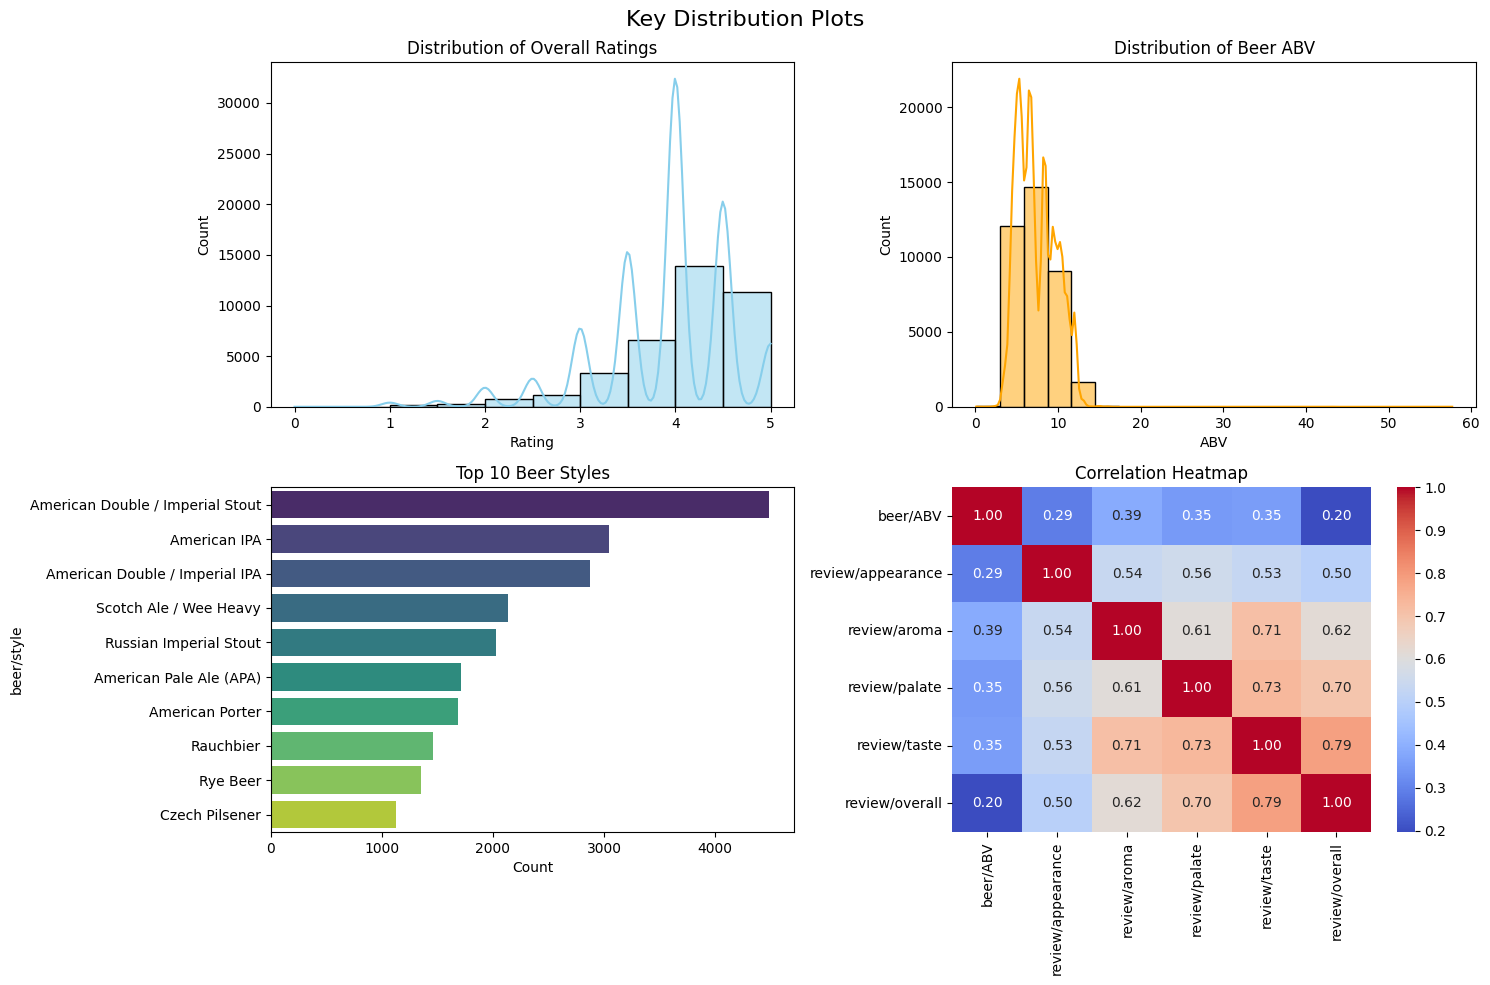


=== Feature Engineering ===
Creating new features...
Processing text features...
Performing sentiment analysis...
Encoding categorical features...

Preparing final feature set...

Final features:
1. beer/ABV
2. review/appearance
3. review/aroma
4. review/palate
5. review/taste
6. review_mean
7. review_std
8. review_length
9. word_count
10. sentiment_compound
11. style_encoded
12. gender_encoded

=== Preparing Train/Test Split ===
Training set shape: (29988, 12)
Test set shape: (7497, 12)

=== Training Random Forest Model ===
Training model...

=== Model Evaluation ===

Test Set Metrics:
RMSE: 0.3996
MAE: 0.3036
R2 Score: 0.6697

=== Feature Importance Analysis ===

Feature Importance Rankings:
               feature  importance
4         review/taste    0.612633
5          review_mean    0.099396
9   sentiment_compound    0.060823
7        review_length    0.043499
0             beer/ABV    0.042610
8           word_count    0.037996
3        review/palate    0.029897
10       style_e

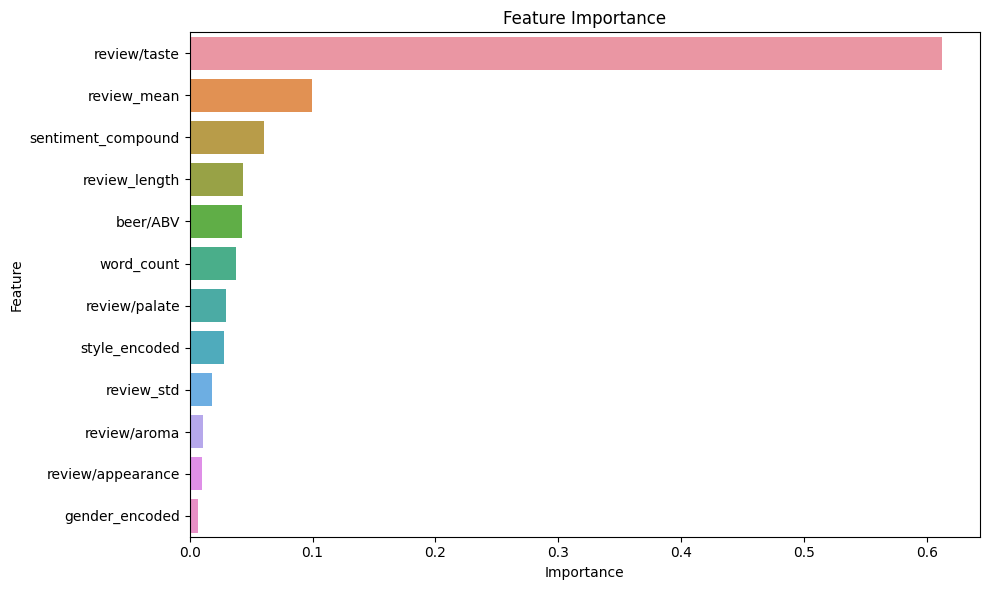


=== Example Predictions ===

Comparison of Actual vs Predicted Ratings:
       Actual Rating  Predicted Rating  Absolute Error
9067             3.5             3.916           0.416
13087            4.5             4.155           0.345
6296             3.0             4.279           1.279
15494            2.5             2.360           0.140
10205            4.0             4.123           0.123

Analysis Complete!


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import warnings
warnings.filterwarnings('ignore')

# Set display options for better output readability
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("Loading data...")
data = pd.read_csv('/kaggle/input/beer-dataset/train.csv')
print(f"Dataset loaded with shape: {data.shape}")

print("\n=== Initial Data Overview ===")
print("\nFirst few rows:")
print(data.head())

print("\nDataset Info:")
print(data.info())

print("\nMissing Values:")
print(data.isnull().sum())

# Data Cleaning
print("\n=== Cleaning Data ===")
print("Handling missing values...")
data = data.dropna(subset=['review/text'])
data['user/gender'] = data['user/gender'].fillna('Unknown')
data = data.drop(['user/ageInSeconds', 'user/birthdayRaw', 'user/birthdayUnix'], axis=1)
data = data.dropna(subset=['user/profileName'])

print("Missing values after cleaning:")
print(data.isnull().sum())

# EDA Visualizations
print("\n=== Creating EDA Visualizations ===")

plt.figure(figsize=(15, 10))
plt.suptitle("Key Distribution Plots", fontsize=16)

# Plot 1: Overall Rating Distribution
plt.subplot(2, 2, 1)
sns.histplot(data['review/overall'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Overall Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

# Plot 2: ABV Distribution
plt.subplot(2, 2, 2)
sns.histplot(data['beer/ABV'].dropna(), bins=20, kde=True, color='orange')
plt.title('Distribution of Beer ABV')
plt.xlabel('ABV')
plt.ylabel('Count')

# Plot 3: Top Beer Styles
plt.subplot(2, 2, 3)
top_styles = data['beer/style'].value_counts().head(10)
sns.barplot(x=top_styles.values, y=top_styles.index, palette='viridis')
plt.title('Top 10 Beer Styles')
plt.xlabel('Count')

# Plot 4: Correlation Heatmap
plt.subplot(2, 2, 4)
numeric_features = ['beer/ABV', 'review/appearance', 'review/aroma', 'review/palate', 'review/taste', 'review/overall']
sns.heatmap(data[numeric_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')

plt.tight_layout()
plt.show()

# Feature Engineering
print("\n=== Feature Engineering ===")

print("Creating new features...")
# Basic statistical features
rating_cols = ['review/appearance', 'review/aroma', 'review/palate', 'review/taste']
data['review_mean'] = data[rating_cols].mean(axis=1)
data['review_std'] = data[rating_cols].std(axis=1)

# Text features
print("Processing text features...")
data['review_length'] = data['review/text'].str.len()
data['word_count'] = data['review/text'].str.split().str.len()

# Sentiment analysis
print("Performing sentiment analysis...")
sia = SentimentIntensityAnalyzer()
data['sentiment_scores'] = data['review/text'].apply(lambda x: sia.polarity_scores(str(x)))
data['sentiment_compound'] = data['sentiment_scores'].apply(lambda x: x['compound'])

# Categorical encoding
print("Encoding categorical features...")
le = LabelEncoder()
data['style_encoded'] = le.fit_transform(data['beer/style'])
data['gender_encoded'] = le.fit_transform(data['user/gender'])

# Feature selection
print("\nPreparing final feature set...")
features = ['beer/ABV', 'review/appearance', 'review/aroma', 'review/palate', 'review/taste',
           'review_mean', 'review_std', 'review_length', 'word_count', 'sentiment_compound',
           'style_encoded', 'gender_encoded']

X = data[features]
y = data['review/overall']

print("\nFinal features:")
for idx, feature in enumerate(features, 1):
    print(f"{idx}. {feature}")

# Split the data
print("\n=== Preparing Train/Test Split ===")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

# Model Training
print("\n=== Training Random Forest Model ===")
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

print("Training model...")
rf_model.fit(X_train, y_train)

# Model Evaluation
print("\n=== Model Evaluation ===")
y_pred = rf_model.predict(X_test)

print("\nTest Set Metrics:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"R2 Score: {r2_score(y_test, y_pred):.4f}")

# Feature Importance Analysis
print("\n=== Feature Importance Analysis ===")
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance Rankings:")
print(feature_importance)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Prediction Example
print("\n=== Example Predictions ===")
example_indices = np.random.randint(0, len(X_test), 5)
example_data = X_test.iloc[example_indices]
example_predictions = rf_model.predict(example_data)
actual_values = y_test.iloc[example_indices]

print("\nComparison of Actual vs Predicted Ratings:")
comparison_df = pd.DataFrame({
    'Actual Rating': actual_values,
    'Predicted Rating': example_predictions,
    'Absolute Error': abs(actual_values - example_predictions)
})
print(comparison_df.round(3))

print("\nAnalysis Complete!")


=== Detailed Rating Analysis ===


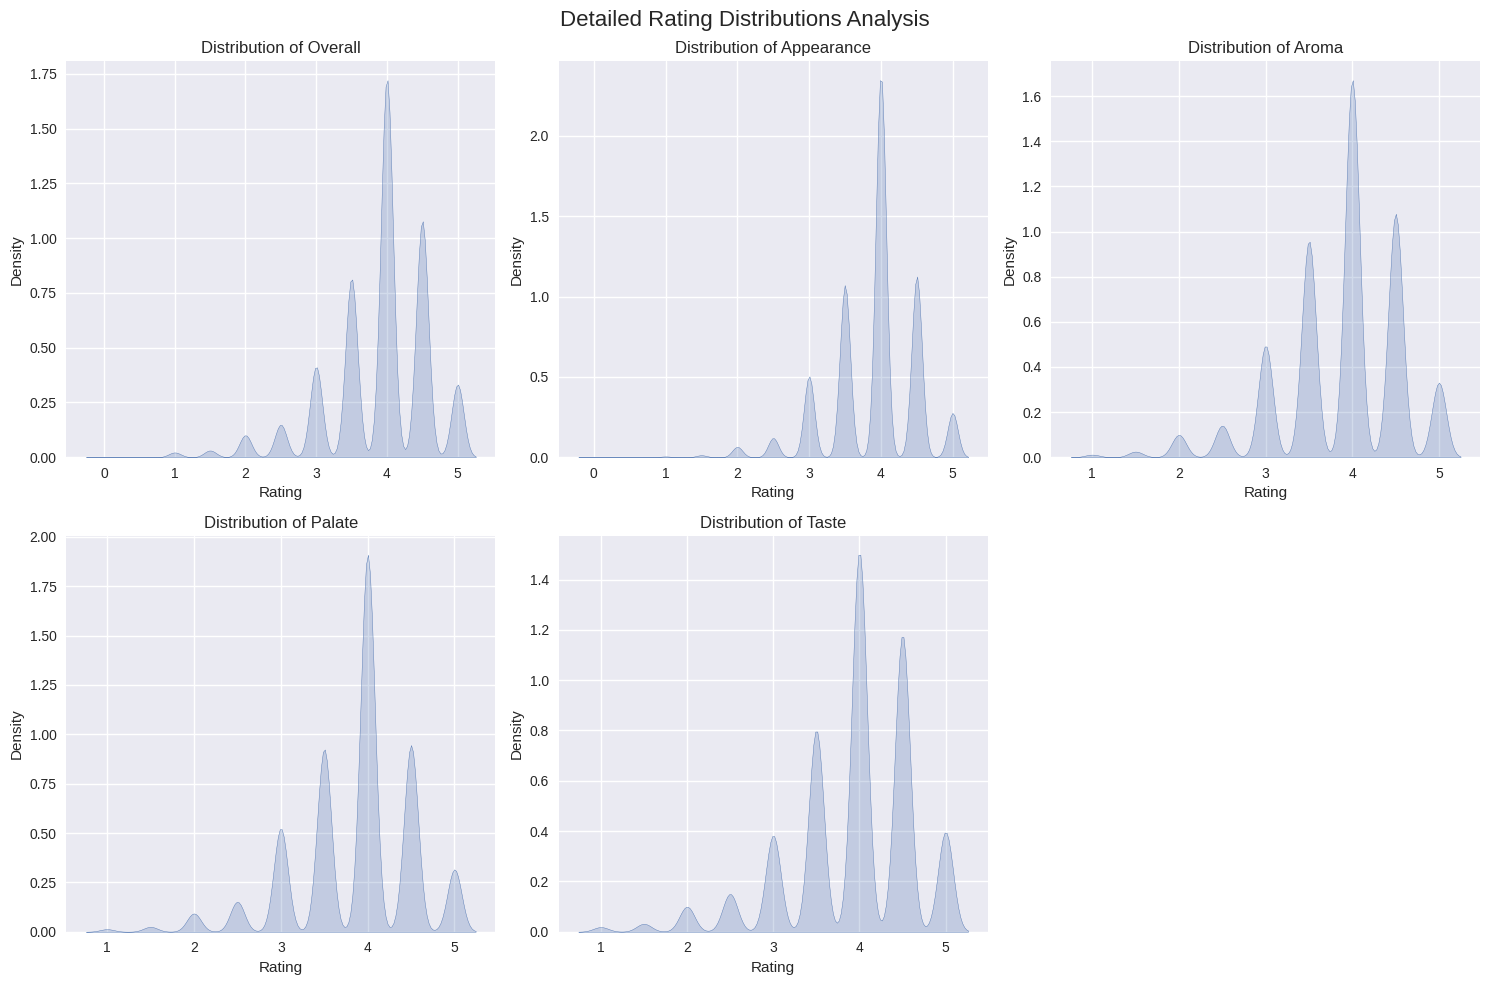


Rating Statistics:
      review/overall  review/appearance  review/aroma  review/palate  \
mean           3.889              3.900         3.873          3.855   
std            0.700              0.589         0.681          0.668   
skew          -1.040             -0.793        -0.830         -0.840   
kurt           1.743              1.517         1.168          1.335   

      review/taste  
mean         3.922  
std          0.716  
skew        -1.001  
kurt         1.459  

=== Beer Style Analysis ===

Top 10 Beer Styles by Review Count:
                                  review_count  avg_rating  rating_std  \
beer/style                                                               
American Double / Imperial Stout          4490       4.327       0.567   
American IPA                              3048       4.045       0.542   
American Double / Imperial IPA            2871       3.869       0.654   
Scotch Ale / Wee Heavy                    2133       3.919       0.582   
Russ

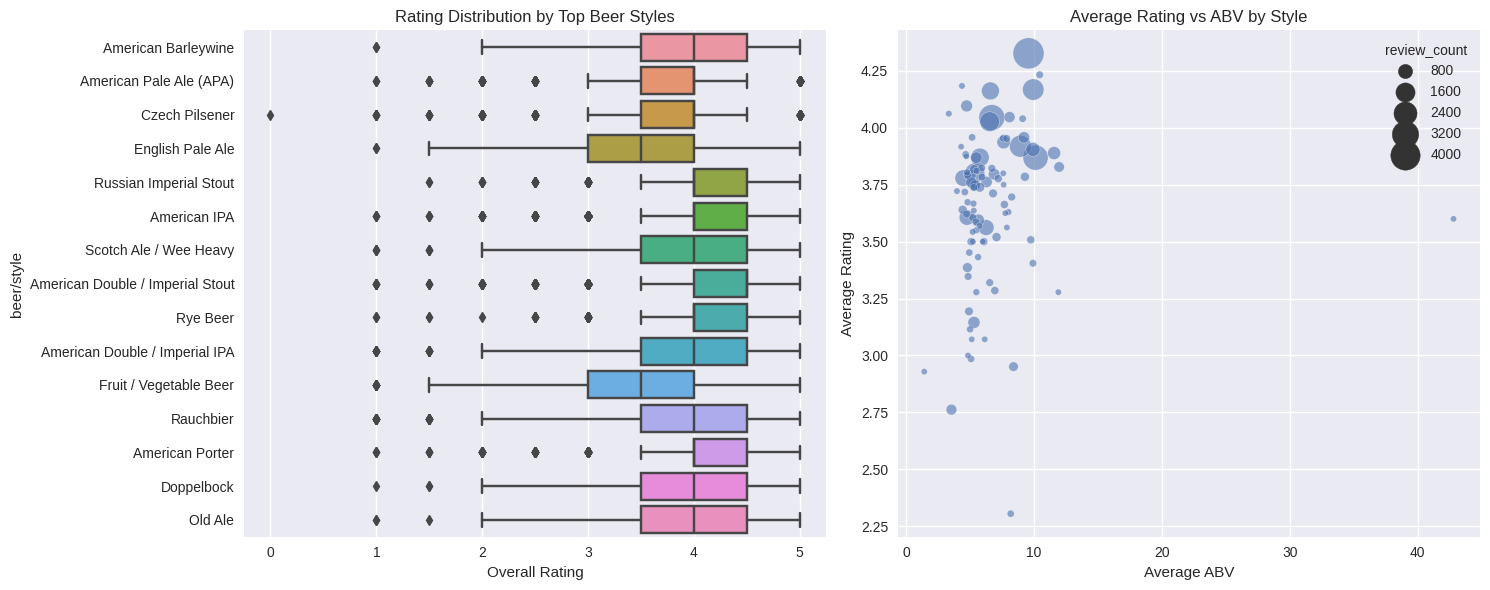


=== User Behavior Analysis ===

User Rating Behavior:
       review_count  avg_rating  rating_std  unique_styles
count      7439.000    7439.000    4283.000       7439.000
mean          5.039       3.936       0.552          3.926
std           8.277       0.609       0.335          5.081
min           1.000       1.000       0.000          1.000
25%           1.000       3.667       0.354          1.000
50%           2.000       4.000       0.500          2.000
75%           5.000       4.300       0.707          5.000
max         141.000       5.000       2.828         64.000


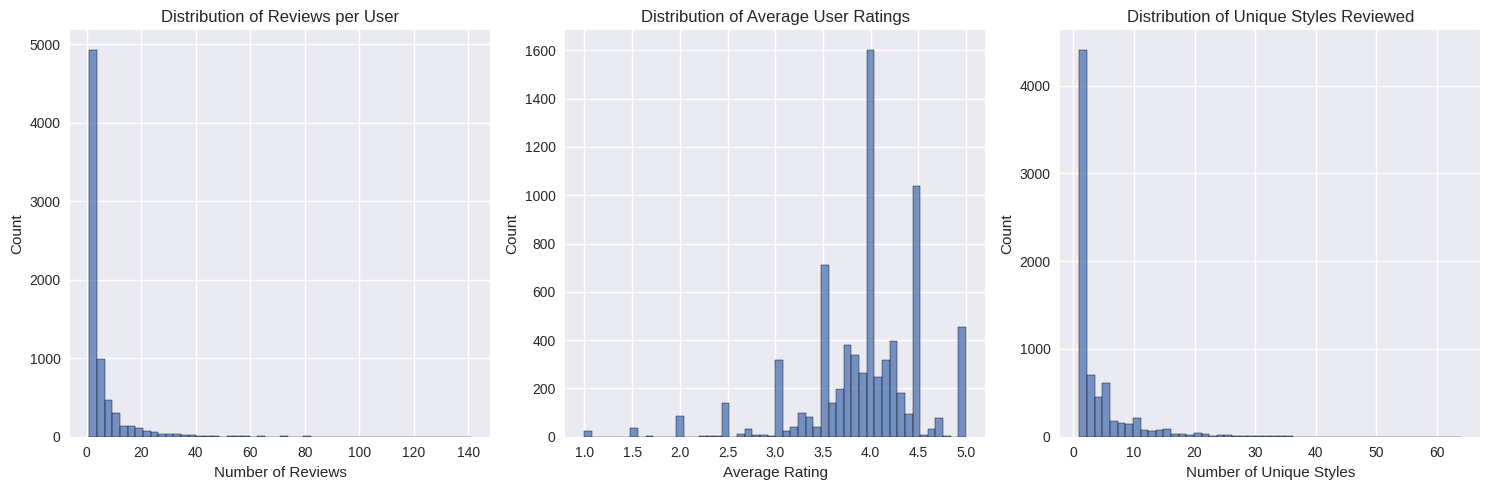


=== Review Text Analysis ===

Text Statistics:
       text_length  word_count
count     37485.00    37485.00
mean        719.09      128.14
std         388.44       70.10
min          49.00        7.00
25%         453.00       80.00
50%         627.00      112.00
75%         874.00      156.00
max        4721.00      892.00


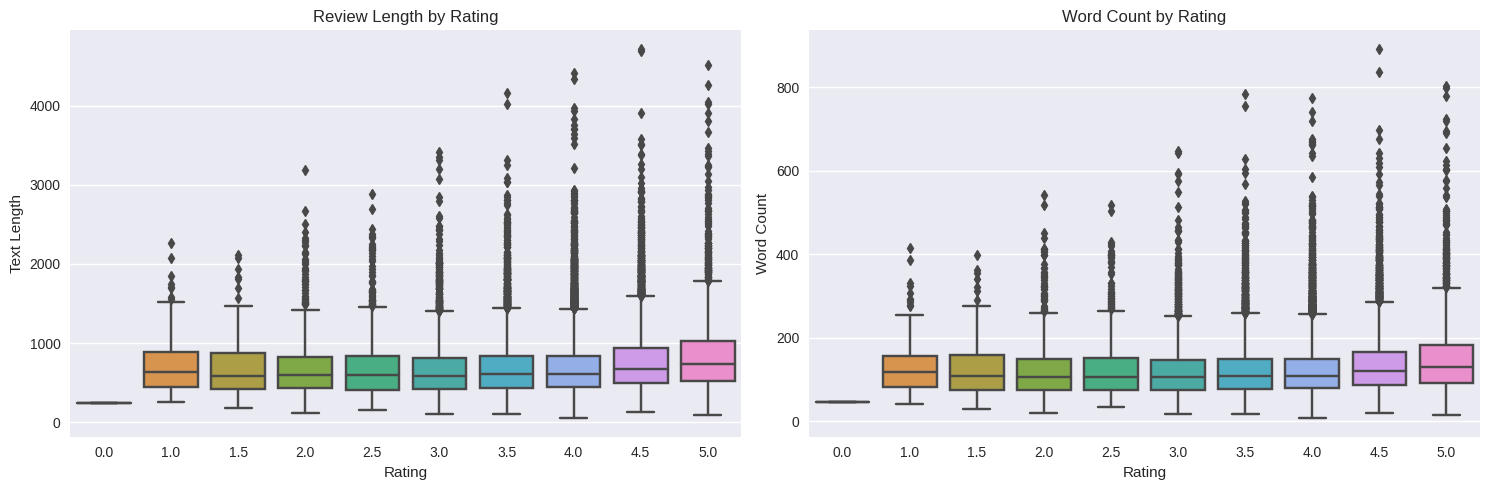


=== Temporal Analysis ===


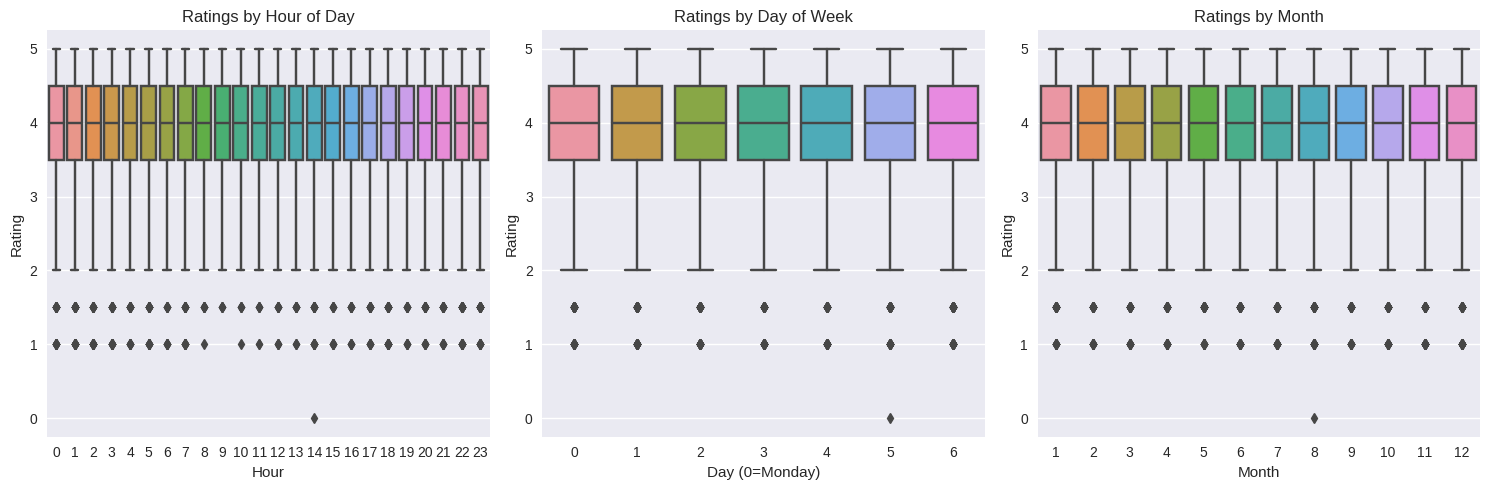


=== Brewery Analysis ===

Top Breweries by Review Count:
               review_count  avg_rating  rating_std  unique_styles  avg_abv
beer/brewerId                                                              
1199                  14968       4.114       0.585             34    8.897
394                    2936       3.920       0.579             30    6.841
14879                  2349       3.934       0.649             14    8.749
263                    1809       3.915       0.706              3    5.764
3268                   1277       3.656       0.706             16    5.884
395                    1225       3.662       0.721             41    7.270
365                    1069       3.781       0.604             17    6.889
1                      1016       3.822       0.702              4    4.440
1417                    908       3.708       0.663              6    4.827
14                      834       4.040       0.543             47    6.948

Key Insights for Feature Engi

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace 'train.csv' with your actual file name)
data = pd.read_csv('/kaggle/input/beer-dataset/train.csv')
#%%
# Display basic information about the dataset
print("Dataset Info:")
print(data.info())

#%%
print("\nFirst 5 rows of the dataset:")
print(data.head())
#%%
# Checking for missing values
print("\nMissing Values in Dataset:")
print(data.isnull().sum())
#%%
# Summary statistics of numerical features
print("\nSummary Statistics of Numerical Features:")
print(data.describe())
#%%
# Dropping rows with missing 'review/text' since it is a key feature
data = data.dropna(subset=['review/text'])

# Imputing 'user/gender' with "Unknown"
data['user/gender'] = data['user/gender'].fillna('Unknown')

# Dropping user-related columns with excessive missing values
data = data.drop(['user/ageInSeconds', 'user/birthdayRaw', 'user/birthdayUnix'], axis=1)

# Dropping rows with missing 'user/profileName'
data = data.dropna(subset=['user/profileName'])

# Confirming missing values after handling
print("\nMissing Values After Processing:")
print(data.isnull().sum())

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn')
pd.set_option('display.max_columns', None)

# 1. Advanced Rating Analysis
print("\n=== Detailed Rating Analysis ===")

# Create figure for rating distributions
plt.figure(figsize=(15, 10))
plt.suptitle("Detailed Rating Distributions Analysis", fontsize=16)

# All ratings distribution comparison
rating_cols = ['review/overall', 'review/appearance', 'review/aroma', 'review/palate', 'review/taste']
for idx, col in enumerate(rating_cols, 1):
    plt.subplot(2, 3, idx)
    sns.kdeplot(data=data[col], fill=True)
    plt.title(f'Distribution of {col.split("/")[1].title()}')
    plt.xlabel('Rating')
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

# Calculate rating statistics
print("\nRating Statistics:")
rating_stats = data[rating_cols].agg(['mean', 'std', 'skew', 'kurt']).round(3)
print(rating_stats)

# 2. Beer Style Analysis
print("\n=== Beer Style Analysis ===")

# Calculate style statistics
style_stats = data.groupby('beer/style').agg({
    'review/overall': ['count', 'mean', 'std'],
    'beer/ABV': 'mean'
}).round(3)

style_stats.columns = ['review_count', 'avg_rating', 'rating_std', 'avg_abv']
style_stats = style_stats.sort_values('review_count', ascending=False)

print("\nTop 10 Beer Styles by Review Count:")
print(style_stats.head(10))

# Visualize style vs rating relationship
plt.figure(figsize=(15, 6))
top_styles = style_stats.head(15).index

plt.subplot(1, 2, 1)
sns.boxplot(data=data[data['beer/style'].isin(top_styles)], 
            x='review/overall', y='beer/style')
plt.title('Rating Distribution by Top Beer Styles')
plt.xlabel('Overall Rating')

plt.subplot(1, 2, 2)
sns.scatterplot(data=style_stats, x='avg_abv', y='avg_rating', 
                size='review_count', sizes=(20, 500), alpha=0.6)
plt.title('Average Rating vs ABV by Style')
plt.xlabel('Average ABV')
plt.ylabel('Average Rating')

plt.tight_layout()
plt.show()

# 3. User Analysis
print("\n=== User Behavior Analysis ===")

# Calculate user statistics
user_stats = data.groupby('user/profileName').agg({
    'review/overall': ['count', 'mean', 'std'],
    'beer/style': 'nunique'
}).round(3)

user_stats.columns = ['review_count', 'avg_rating', 'rating_std', 'unique_styles']
print("\nUser Rating Behavior:")
print(user_stats.describe().round(3))

# Visualize user rating patterns
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(user_stats['review_count'], bins=50)
plt.title('Distribution of Reviews per User')
plt.xlabel('Number of Reviews')

plt.subplot(1, 3, 2)
sns.histplot(user_stats['avg_rating'], bins=50)
plt.title('Distribution of Average User Ratings')
plt.xlabel('Average Rating')

plt.subplot(1, 3, 3)
sns.histplot(user_stats['unique_styles'], bins=50)
plt.title('Distribution of Unique Styles Reviewed')
plt.xlabel('Number of Unique Styles')

plt.tight_layout()
plt.show()

# 4. Text Analysis
print("\n=== Review Text Analysis ===")

# Calculate text statistics
data['text_length'] = data['review/text'].str.len()
data['word_count'] = data['review/text'].str.split().str.len()

print("\nText Statistics:")
text_stats = data[['text_length', 'word_count']].describe().round(2)
print(text_stats)

# Analyze relationship between text length and rating
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='review/overall', y='text_length', data=data)
plt.title('Review Length by Rating')
plt.xlabel('Rating')
plt.ylabel('Text Length')

plt.subplot(1, 2, 2)
sns.boxplot(x='review/overall', y='word_count', data=data)
plt.title('Word Count by Rating')
plt.xlabel('Rating')
plt.ylabel('Word Count')

plt.tight_layout()
plt.show()

# 5. Time Analysis
print("\n=== Temporal Analysis ===")

# Convert Unix timestamp to datetime
data['review_time'] = pd.to_datetime(data['review/timeUnix'], unit='s')
data['hour'] = data['review_time'].dt.hour
data['day_of_week'] = data['review_time'].dt.dayofweek
data['month'] = data['review_time'].dt.month
data['year'] = data['review_time'].dt.year

# Analyze rating patterns over time
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='hour', y='review/overall', data=data)
plt.title('Ratings by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Rating')

plt.subplot(1, 3, 2)
sns.boxplot(x='day_of_week', y='review/overall', data=data)
plt.title('Ratings by Day of Week')
plt.xlabel('Day (0=Monday)')
plt.ylabel('Rating')

plt.subplot(1, 3, 3)
sns.boxplot(x='month', y='review/overall', data=data)
plt.title('Ratings by Month')
plt.xlabel('Month')
plt.ylabel('Rating')

plt.tight_layout()
plt.show()

# 6. Brewery Analysis
print("\n=== Brewery Analysis ===")

brewery_stats = data.groupby('beer/brewerId').agg({
    'review/overall': ['count', 'mean', 'std'],
    'beer/style': 'nunique',
    'beer/ABV': 'mean'
}).round(3)

brewery_stats.columns = ['review_count', 'avg_rating', 'rating_std', 'unique_styles', 'avg_abv']
brewery_stats = brewery_stats.sort_values('review_count', ascending=False)

print("\nTop Breweries by Review Count:")
print(brewery_stats.head(10))

print("\nKey Insights for Feature Engineering:")
print("1. Rating Patterns:")
print(f"- Overall rating mean: {data['review/overall'].mean():.3f}")
print(f"- Standard deviation: {data['review/overall'].std():.3f}")
print(f"- Correlation between taste and overall: {data['review/taste'].corr(data['review/overall']):.3f}")

print("\n2. User Behavior:")
print(f"- Average reviews per user: {user_stats['review_count'].mean():.1f}")
print(f"- Users with >10 reviews: {(user_stats['review_count'] > 10).mean()*100:.1f}%")

print("\n3. Style Impact:")
print(f"- Number of unique styles: {data['beer/style'].nunique()}")
print(f"- Style with highest avg rating: {style_stats['avg_rating'].idxmax()}")

print("\n4. Text Features:")
print(f"- Median review length: {data['text_length'].median():.1f} characters")
print(f"- Correlation between text length and rating: {data['text_length'].corr(data['review/overall']):.3f}")

# Save processed dataframe for feature engineering
print("\nSaving processed data for feature engineering...")
data.to_csv('processed_beer_data.csv', index=False)
print("Analysis complete!")

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
data = pd.read_csv('/kaggle/input/beer-dataset/train.csv')

# Initial data cleaning (from your code)
data['review/text'] = data['review/text'].fillna("No review provided")
data['user/gender'] = data['user/gender'].fillna('Unknown')
data = data.drop(['user/ageInSeconds', 'user/birthdayRaw', 'user/birthdayUnix'], axis=1)
data = data.dropna(subset=['user/profileName'])

# Feature Engineering
def create_advanced_features(data):
    features = data.copy()
    
    # 1. Rating-based Features
    rating_cols = ['review/appearance', 'review/aroma', 'review/palate', 'review/taste']
    features['rating_std'] = features[rating_cols].std(axis=1)
    features['rating_range'] = features[rating_cols].max(axis=1) - features[rating_cols].min(axis=1)
    
    # Weighted Ratings
    weights = {
        'review/taste': 0.4,
        'review/aroma': 0.3,
        'review/palate': 0.2,
        'review/appearance': 0.1
    }
    features['weighted_rating'] = sum(features[col] * weight for col, weight in weights.items())
    
    # Rating Ratios
    features['taste_aroma_ratio'] = features['review/taste'] / features['review/aroma']
    features['palate_appearance_ratio'] = features['review/palate'] / features['review/appearance']
    
    # 2. Style and ABV Features
    style_means = features.groupby('beer/style')['review/overall'].mean()
    features['style_avg_rating'] = features['beer/style'].map(style_means)
    features['abv_category'] = pd.qcut(features['beer/ABV'], q=5, labels=['very_low', 'low', 'medium', 'high', 'very_high'])
    features['abv_squared'] = features['beer/ABV'] ** 2
    
    # 3. Time Features
    features['review_hour'] = pd.to_datetime(features['review/timeUnix'], unit='s').dt.hour
    features['review_day'] = pd.to_datetime(features['review/timeUnix'], unit='s').dt.dayofweek
    features['is_weekend'] = features['review_day'].isin([5, 6]).astype(int)
    
    # 4. Text Features
    features['text_length'] = features['review/text'].str.len()
    features['word_count'] = features['review/text'].str.split().str.len()
    
    # Sentiment Analysis
    def get_sentiment(text):
        return TextBlob(str(text)).sentiment.polarity
    features['review_sentiment'] = features['review/text'].apply(get_sentiment)
    
    # Keyword Features
    positive_keywords = ['excellent', 'amazing', 'perfect', 'fantastic', 'great']
    negative_keywords = ['poor', 'bad', 'disappointing', 'awful', 'mediocre']
    
    def count_keywords(text, keyword_list):
        return sum(word.lower() in str(text).lower() for word in keyword_list)
    
    features['positive_keyword_count'] = features['review/text'].apply(lambda x: count_keywords(x, positive_keywords))
    features['negative_keyword_count'] = features['review/text'].apply(lambda x: count_keywords(x, negative_keywords))
    
    # 5. User Features
    user_review_counts = features.groupby('user/profileName').size()
    user_avg_ratings = features.groupby('user/profileName')['review/overall'].mean()
    
    features['user_review_count'] = features['user/profileName'].map(user_review_counts)
    features['user_avg_rating'] = features['user/profileName'].map(user_avg_ratings)
    features['user_experience'] = pd.qcut(features['user_review_count'], q=5, labels=['novice', 'casual', 'regular', 'experienced', 'expert'])
    
    # 6. Brewery Features
    brewery_reviews = features.groupby('beer/brewerId').size()
    brewery_avg_ratings = features.groupby('beer/brewerId')['review/overall'].mean()
    
    features['brewery_review_count'] = features['beer/brewerId'].map(brewery_reviews)
    features['brewery_avg_rating'] = features['beer/brewerId'].map(brewery_avg_ratings)
    
    return features

# Create features
print("Creating features...")
features = create_advanced_features(data)

# Prepare for modeling
print("Preparing for modeling...")
# Convert categorical variables
le = LabelEncoder()
categorical_cols = ['abv_category', 'user_experience', 'beer/style']
for col in categorical_cols:
    features[col] = le.fit_transform(features[col])

# Select features
selected_features = [
    'weighted_rating', 'style_avg_rating', 'beer/ABV', 'abv_squared',
    'text_length', 'word_count', 'review_sentiment',
    'user_review_count', 'user_avg_rating', 'brewery_avg_rating',
    'positive_keyword_count', 'negative_keyword_count',
    'rating_std', 'brewery_review_count', 'is_weekend',
    'abv_category', 'user_experience', 'beer/style',
    'review/taste', 'review/aroma', 'review/appearance', 'review/palate'
]

X = features[selected_features]
y = features['review/overall']



# # Train model
# print("Training Random Forest model...")
# rf_model = RandomForestRegressor(
#     n_estimators=200,
#     max_depth=15,
#     min_samples_split=5,
#     min_samples_leaf=2,
#     n_jobs=-1,
#     random_state=42
# )

# rf_model.fit(X_train, y_train)

# # Model evaluation
# print("\nEvaluating model...")
# train_pred = rf_model.predict(X_train)
# test_pred = rf_model.predict(X_test)

# # Calculate metrics
# metrics = {
#     'Train R2': r2_score(y_train, train_pred),
#     'Test R2': r2_score(y_test, test_pred),
#     'Train RMSE': np.sqrt(mean_squared_error(y_train, train_pred)),
#     'Test RMSE': np.sqrt(mean_squared_error(y_test, test_pred)),
#     'Train MAE': mean_absolute_error(y_train, train_pred),
#     'Test MAE': mean_absolute_error(y_test, test_pred)
# }

# # Print results
# print("\nModel Performance Metrics:")
# for metric_name, value in metrics.items():
#     print(f"{metric_name}: {value:.4f}")

# # Feature importance
# importance = pd.DataFrame({
#     'feature': selected_features,
#     'importance': rf_model.feature_importances_
# }).sort_values('importance', ascending=False)

# print("\nTop 10 Most Important Features:")
# print(importance.head(10))

# # Cross-validation
# print("\nPerforming cross-validation...")
# cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')
# print(f"Cross-validation R2 scores: {cv_scores}")
# print(f"Mean CV R2: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# # Save model (optional)
# import joblib
# print("\nSaving model and scaler...")
# joblib.dump(rf_model, 'beer_rating_model.joblib')
# joblib.dump(scaler, 'beer_rating_scaler.joblib')

# print("\nAnalysis complete!")

Creating features...
Preparing for modeling...


In [3]:
# Train-test split
print("Splitting data...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
print("Scaling features...")
scaler = StandardScaler()
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])
from sklearn.model_selection import cross_val_score
import lightgbm as lgb
import xgboost as xgb
# Train LightGBM Model
print("\nTraining LightGBM model...")
lgb_model = lgb.LGBMRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=-1,
    random_state=42
)
lgb_model.fit(X_train, y_train)

# Perform Cross-Validation for LightGBM
print("\nPerforming cross-validation for LightGBM...")
lgb_cv_scores = cross_val_score(lgb_model, X, y, cv=5, scoring='r2')
print(f"Cross-validation R2 scores (LightGBM): {lgb_cv_scores}")
print(f"Mean CV R2 (LightGBM): {lgb_cv_scores.mean():.4f} (+/- {lgb_cv_scores.std() * 2:.4f})")

# Train XGBoost Model
print("\nTraining XGBoost model...")
xgb_model = xgb.XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    objective='reg:squarederror',
    random_state=42
)
xgb_model.fit(X_train, y_train)

# Perform Cross-Validation for XGBoost
print("\nPerforming cross-validation for XGBoost...")
xgb_cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='r2')
print(f"Cross-validation R2 scores (XGBoost): {xgb_cv_scores}")
print(f"Mean CV R2 (XGBoost): {xgb_cv_scores.mean():.4f} (+/- {xgb_cv_scores.std() * 2:.4f})")

# Model Evaluation Function
def evaluate_model(model, model_name):
    print(f"\nEvaluating {model_name}...")
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    metrics = {
        'Train R2': r2_score(y_train, train_pred),
        'Test R2': r2_score(y_test, test_pred),
        'Train RMSE': np.sqrt(mean_squared_error(y_train, train_pred)),
        'Test RMSE': np.sqrt(mean_squared_error(y_test, test_pred)),
        'Train MAE': mean_absolute_error(y_train, train_pred),
        'Test MAE': mean_absolute_error(y_test, test_pred)
    }
    
    print(f"\n{model_name} Performance Metrics:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")
    
    return metrics

# Evaluate both models
lgb_metrics = evaluate_model(lgb_model, "LightGBM")
xgb_metrics = evaluate_model(xgb_model, "XGBoost")

# Feature Importance for LightGBM
lgb_importance = pd.DataFrame({
    'feature': selected_features,
    'importance': lgb_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features (LightGBM):")
print(lgb_importance.head(10))

# Feature Importance for XGBoost
xgb_importance = pd.DataFrame({
    'feature': selected_features,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features (XGBoost):")
print(xgb_importance.head(10))


Splitting data...
Scaling features...

Training LightGBM model...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002790 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1909
[LightGBM] [Info] Number of data points in the train set: 29996, number of used features: 22
[LightGBM] [Info] Start training from score 3.887202

Performing cross-validation for LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002792 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1890
[LightGBM] [Info] Number of data points in the train set: 29996, number of used features: 22
[LightGBM] [Info] Start training from score 3.889885
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of tes

In [4]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

# Train CatBoost Model
print("\nTraining CatBoost model...")
catboost_model = CatBoostRegressor(
    iterations=200,
    learning_rate=0.1,
    depth=6,
    loss_function='RMSE',
    random_seed=42,
    verbose=False
)
catboost_model.fit(X_train, y_train)

# Perform Cross-Validation for CatBoost
print("\nPerforming cross-validation for CatBoost...")
catboost_cv_scores = cross_val_score(catboost_model, X, y, cv=5, scoring='r2')
print(f"Cross-validation R2 scores (CatBoost): {catboost_cv_scores}")
print(f"Mean CV R2 (CatBoost): {catboost_cv_scores.mean():.4f} (+/- {catboost_cv_scores.std() * 2:.4f})")

# Evaluate CatBoost model using the existing evaluation function
catboost_metrics = evaluate_model(catboost_model, "CatBoost")

# Get feature importance for CatBoost
catboost_importance = pd.DataFrame({
    'feature': selected_features,
    'importance': catboost_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features (CatBoost):")
print(catboost_importance.head(10))

# Compare all three models
print("\nModel Comparison Summary:")
models_comparison = pd.DataFrame({
    'LightGBM': {
        'Test R2': lgb_metrics['Test R2'],
        'Test RMSE': lgb_metrics['Test RMSE'],
        'Test MAE': lgb_metrics['Test MAE'],
        'CV R2 Mean': lgb_cv_scores.mean()
    },
    'XGBoost': {
        'Test R2': xgb_metrics['Test R2'],
        'Test RMSE': xgb_metrics['Test RMSE'],
        'Test MAE': xgb_metrics['Test MAE'],
        'CV R2 Mean': xgb_cv_scores.mean()
    },
    'CatBoost': {
        'Test R2': catboost_metrics['Test R2'],
        'Test RMSE': catboost_metrics['Test RMSE'],
        'Test MAE': catboost_metrics['Test MAE'],
        'CV R2 Mean': catboost_cv_scores.mean()
    }
}).round(4)

print(models_comparison)


Training CatBoost model...

Performing cross-validation for CatBoost...
Cross-validation R2 scores (CatBoost): [0.73822085 0.75374321 0.74294789 0.73592595 0.73178606]
Mean CV R2 (CatBoost): 0.7405 (+/- 0.0151)

Evaluating CatBoost...

CatBoost Performance Metrics:
Train R2: 0.7584
Test R2: 0.7410
Train RMSE: 0.3449
Test RMSE: 0.3538
Train MAE: 0.2588
Test MAE: 0.2676

Top 10 Most Important Features (CatBoost):
              feature  importance
18       review/taste   29.231018
0     weighted_rating   25.792891
8     user_avg_rating   17.188756
21      review/palate    7.473979
7   user_review_count    6.144437
2            beer/ABV    2.189009
6    review_sentiment    1.609152
1    style_avg_rating    1.470656
3         abv_squared    1.451591
17         beer/style    1.256453

Model Comparison Summary:
            LightGBM  XGBoost  CatBoost
Test R2       0.7364   0.7385    0.7410
Test RMSE     0.3570   0.3555    0.3538
Test MAE      0.2698   0.2678    0.2676
CV R2 Mean    0.7378   